In [19]:
df = pd.read_csv('adult.csv', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native country', 'Class'])

In [18]:
with open('adult.names','r') as f: 
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [20]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native country    0
Class             0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

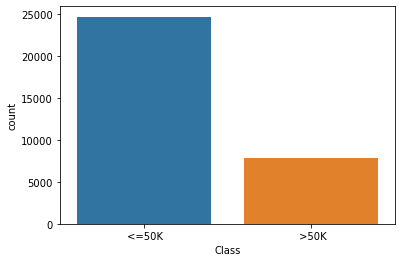

In [22]:
sns.countplot(data=df, x='Class')

<AxesSubplot:xlabel='Class', ylabel='count'>

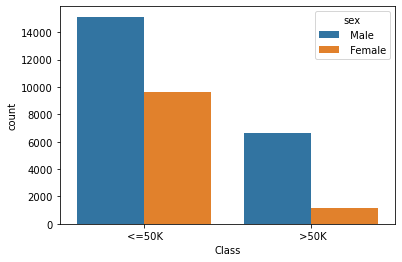

In [25]:
sns.countplot(data=df, x='Class', hue='sex')

<AxesSubplot:xlabel='Class', ylabel='count'>

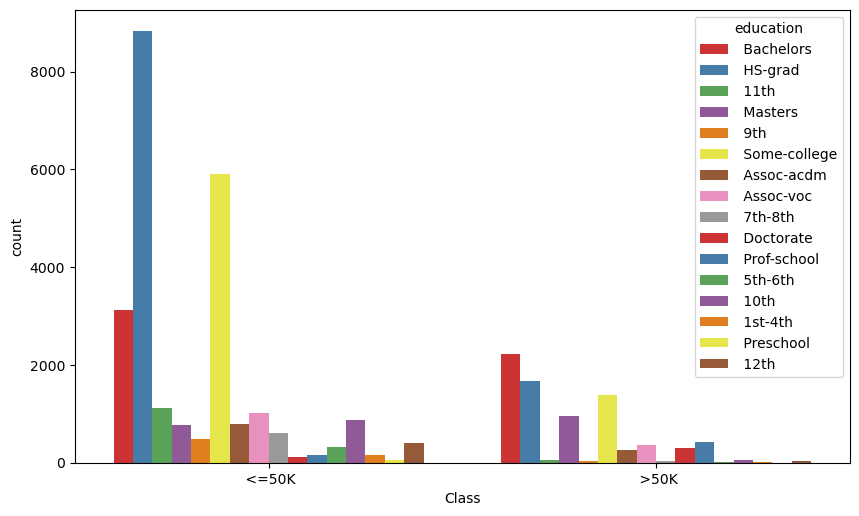

In [38]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='Class', hue='education', palette='Set1')

<AxesSubplot:xlabel='Class', ylabel='count'>

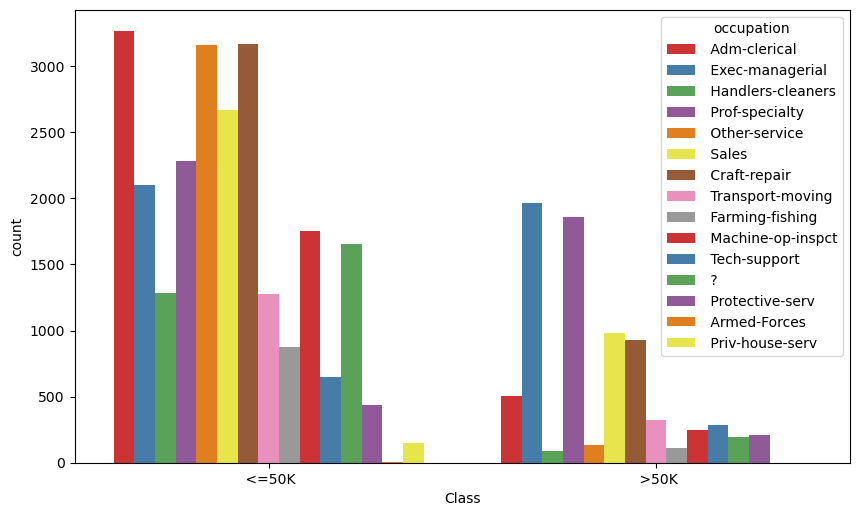

In [40]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='Class', hue='occupation', palette='Set1')

<AxesSubplot:xlabel='Class', ylabel='count'>

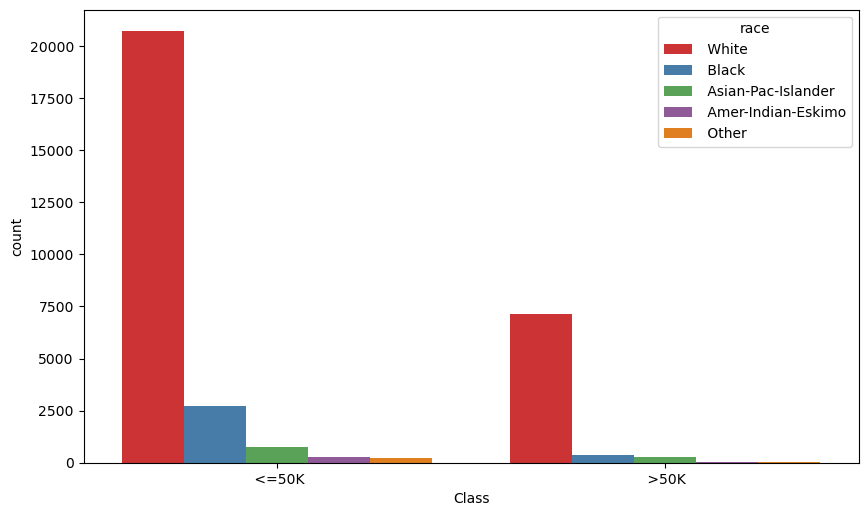

In [41]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='Class', hue='race', palette='Set1')

In [62]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [63]:
X = pd.get_dummies(X, drop_first=True)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
scaler = StandardScaler()

In [68]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [79]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [73]:
len(scaled_X_test)

9769

## KNN

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7436
        >50K       0.64      0.58      0.61      2333

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769



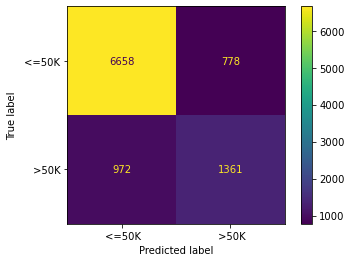

In [80]:
model = KNeighborsClassifier()
run_model(model,scaled_X_train,y_train,scaled_X_test,y_test)

## SVC

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7436
        >50K       0.74      0.58      0.65      2333

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



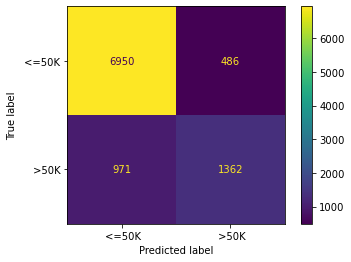

In [74]:
model = SVC()
run_model(model,scaled_X_train,y_train,scaled_X_test,y_test)

## Decision Trees

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7436
        >50K       0.61      0.64      0.62      2333

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.81      0.82      9769



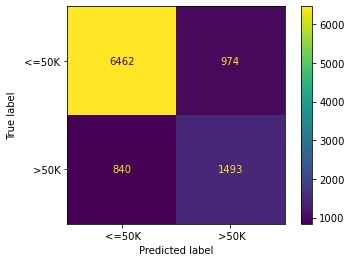

In [81]:
model = DecisionTreeClassifier()
run_model(model,X_train,y_train,X_test,y_test)

## Random Forest

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7436
        >50K       0.73      0.63      0.68      2333

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



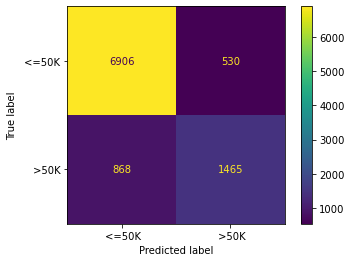

In [82]:
model = RandomForestClassifier()
run_model(model,X_train,y_train,X_test,y_test)

## AdaBoost

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7436
        >50K       0.75      0.63      0.68      2333

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



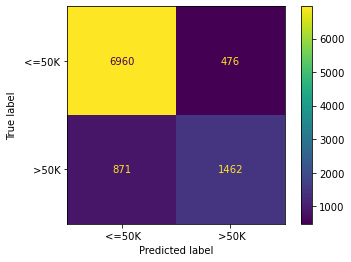

In [83]:
model = AdaBoostClassifier()
run_model(model,X_train,y_train,X_test,y_test)

## GradBoost

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7436
        >50K       0.79      0.63      0.70      2333

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



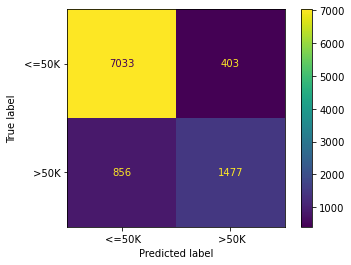

In [84]:
model = GradientBoostingClassifier()
run_model(model,X_train,y_train,X_test,y_test)

In [85]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {'learning_rate': [0.1, 0.2], 'n_estimators': [50, 100, 150, 200]}

In [94]:
grad = GradientBoostingClassifier()
grad_grid = GridSearchCV(grad, param_grid)

In [95]:
grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2],
                         'n_estimators': [50, 100, 150, 200]})

In [96]:
grad_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [97]:
grid_preds = grad_grid.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7436
        >50K       0.78      0.66      0.72      2333

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



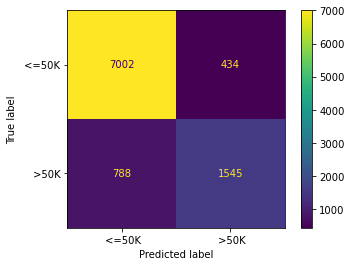

In [98]:
print(classification_report(y_test, grid_preds))
ConfusionMatrixDisplay.from_predictions(y_test, grid_preds)

In [101]:
df.to_csv("Final_Adult_Model.csv", index=False)